# AutoGenU for Jupyter

An Automatic C++ Code Generator for Nonlinear Model Predictive Control (NMPC)  

---  

## Formulation of the optimal control problem: Hexacopter

### Model description
Let $(X, Y, Z)$ be a position of the center of the hexiacopter in the world frame, $(\phi, \theta, \psi)$ be the Euler angle of the hexacopter in the world frame, respectively. We assume that we can control the thrust of the each rotor directly. Thus, we assume that the $i$th control input $u_i$ is the thrust of the corresponding rotor. The equation of the motion is derived by the Newton-Euler equations as 
$$ \begin{bmatrix} \ddot{X} \\ \ddot{Y} \\ \ddot{Z} \\ \ddot{\phi} \\ \ddot{\theta} \\ \ddot{\psi} \end{bmatrix} = \begin{bmatrix} (\cos{\psi} \sin{\theta} \cos{\phi} + \sin{\psi} \sin{\phi}) \frac{U_1}{m} \\ (\sin{\psi} \sin{\theta} \cos{\phi} - \cos{\psi} \sin{\phi}) \frac{U_1}{m} \\ -g + (\cos{\theta} \cos{\phi}) \frac{U_1}{m}  \\ \frac{I_{YY} - I_{ZZ}}{I_{XX}} \dot{\theta} \dot{\psi} + \frac{U_2}{I_{XX}} \\ \frac{I_{ZZ} - I_{XX}}{I_{YY}} \dot{\psi} \dot{\phi} + \frac{U_3}{I_{YY}} \\ \frac{I_{XX} - I_{YY}}{I_{ZZ}} \dot{\phi} \dot{\theta} + \frac{U_4}{I_{ZZ}} \end{bmatrix} , $$
where
$$ U_1 = \sum_{i=1}^{6} u_i ,$$
$$ U_2 = l(-\frac{u_1}{2} - u_2 - \frac{u_3}{2} + \frac{u_4}{2} + u_5 + \frac{u_6}{2} ) ,$$
$$ U_3 = l(- \frac{\sqrt{3}}{2} u_1 + \frac{\sqrt{3}}{2} u_3 + \frac{\sqrt{3}}{2} u_4 - \frac{\sqrt{3}}{2} u_6) , $$
$$ U_4 = k(-u_1 + u_1 - u_2 + u_3 - u_4 + u_5) - \gamma \dot{\psi} .$$
We also assume that the thrust of the each rotor is limited as  
$$u_{\rm min} \leq u_i \leq u_{\rm max} , i= 1, ..., 6,  $$
where $u_{\rm min}, u_{\rm max} \in \mathbb{R}$.

### Formulation of the optimal control problem
We define the state vector as
$$ x = \begin{bmatrix} {X} & {Y} & {Z} & {\phi} & {\theta} & {\psi} & \dot{X} & \dot{Y} & \dot{Z} & \dot{\phi} & \dot{\theta} & \dot{\psi} \end{bmatrix}^{\rm T} .$$
The state equation is then given as 
$$\dot{x} = f(t, x, u) = \begin{bmatrix} \dot{X} \\ \dot{Y} \\ \dot{Z} \\ \dot{\phi} \\ \dot{\theta} \\ \dot{\psi} \\ (\cos{\psi} \sin{\theta} \cos{\phi} + \sin{\psi} \sin{\phi}) \frac{U_1}{m} \\ (\sin{\psi} \sin{\theta} \cos{\phi} - \cos{\psi} \sin{\phi}) \frac{U_1}{m} \\ -g + (\cos{\theta} \cos{\phi}) \frac{U_1}{m}  \\ \frac{I_{YY} - I_{ZZ}}{I_{XX}} \dot{\theta} \dot{\psi} + \frac{U_2}{I_{XX}} \\ \frac{I_{ZZ} - I_{XX}}{I_{YY}} \dot{\psi} \dot{\phi} + \frac{U_3}{I_{YY}} \\ \frac{I_{XX} - I_{YY}}{I_{ZZ}} \dot{\phi} \dot{\theta} + \frac{U_4}{I_{ZZ}} \end{bmatrix} .$$
In this problem, we consider the inequality constraints using the barrier function method. In the barrier function method, an inequality constraint 
$$ C(t, x, u) \geq 0 $$
is considered by adding the following berrier function to the cost function
$$ - \epsilon \ln\left(\frac{1}{C(t, x, u)}\right), $$
where $\epsilon$ is a sufficient small positive constant. In this problem, we add barrier functions given by
$$ b(u) :=  - \epsilon \sum_{i=1}^{6} \ln\left(\frac{1}{u_{\rm max} - u_i}\right) - \epsilon \sum_{i=1}^{6} \ln\left(\frac{1}{u_i - u_{\rm min}}\right)  $$
to the stage cost in the cost function. Next, we design the cost function 
$$ J = \varphi(t, x) + \int_{t}^{t+T} L(t, x, u) .$$
The objective is to make the hexacopter track a reference trajectory. We assume that the reference trajectory is given as 
$$ p_{\rm ref} (t) := \begin{bmatrix} X_{\rm ref} (t) \\ Y_{\rm ref} (t) \\ Z_{\rm ref} (t) \end{bmatrix} = \begin{bmatrix} \sin{2t} \\ 1-\cos{2t} \\ z_0 + 2 \sin{t} \end{bmatrix} , $$
where $z_0$ is a positive real constant. We define a time-dependent vector valued function
$$ x_{\rm ref} (t) := \begin{bmatrix} p_{\rm ref} (t) \\ \dot{p}_{\rm ref} (t) \\ 0_3 \\ 0_3 \end{bmatrix} , $$
where $0_3$ is a 3-dimensional zero vector. To make the hexacopter track $p_{\rm ref}$, we set the terminal cost as
$$\varphi(t,x) = \frac{1}{2} (x - x_{\rm ref}(t))^{\rm T} Q_{\rm terminal} (x - x_{\rm ref}(t)) ,$$  
where $Q_{\rm terminal} = {\rm diag}\left\{ {q_{\rm terminal}}_1, ... ,{q_{\rm terminal}}_{12} \right\}$ and ${q_{\rm terminal}}_1, ..., {q_{\rm terminal}}_{12}$ are positive real constants. We also set the stage cost as  
$$L(t, x, u) = \frac{1}{2} (x - x_{\rm ref}(t))^{\rm T} Q (x - x_{\rm ref}) + \frac{1}{2} (u - u_{\rm ref}(t))^{\rm T} R (x - u_{\rm ref}) + b(u),$$  
where $Q = {\rm diag} \left\{ q_1, ..., q_{12} \right\}$ with positive real constants $q_1, ..., q_{12}$, $R = {\rm diag} \left\{ r_1, ..., r_{6} \right\}$ with positive real constants $r_1, ..., r_{6}$, $u_{\rm ref} \in \mathbb{R}^6$ is given by
$$ u_{\rm ref} := \begin{bmatrix} \frac{mg}{6} \\ \frac{mg}{6} \\ \frac{mg}{6} \\ \frac{mg}{6} \\ \frac{mg}{6} \\ \frac{mg}{6} \end{bmatrix} .$$


### Numerical solver of NMPC
In the following example, we compute the solution of NMPC using the multiple shooting based C/GMRES method with condensing variables with respect to the state.

### Reference
The derivative of the model of the hexacopter is reference to [1] and [2]. The paremeters of the hexacopter in the following numerical simulation are based on [1].
1. [Y. Aoki et.al., Nonlinear Model Predictive Control of Position and Attitude in a Hexacopter with Three Failed Rotors, IFAC-PapersOnLine, Vol. 51, No. 20, pp. 228-233 (2018)](https://doi.org/10.1016/j.ifacol.2018.11.018)
2. [M. Moussid et.al., Dynamic Modeling and Control of a HexaRotor using Linear and Nonlinear Methods, International Journal of Applied Information Systems, Vol. 9, No. 5, pp. 9-17 (2015)](https://doi.org/10.5120/ijais2015451411)

---

# Generate C++ codes of NMPC model  

## Import modules

In [1]:
from autogenu import autogenu

## Set dimensions and define `AutoGenU`
- `dimx`: Dimension of the state vector $x$   
- `dimu`: Dimension of the control input vector $u$  
- `model_name`: Name of the model. Used as the name of the directory containing the generated C++ source files.

In [2]:
dimx = 12
dimu = 6
model_name = 'hexacopter'
ag = autogenu.AutoGenU(model_name, dimx, dimu)

## Generate t, x, and u, necessary variables to formulate of the optimal control problem
- `t`: Time parameter $t$  
- `x`: The state vector $x$  
- `u`: The control input vector $u$  

In [3]:
t = ag.define_t()
x = ag.define_x()
u = ag.define_u()

## Define variables used in the state equation, constraints, and cost function
- Define a scalar variable whose name is "var" as  
`var = ag.define_scalar_var('var') `

- Define scalar variables whose names are "var\_1", "var\_2", ..., "var\_n" as  
`var_1, var_2, ..., var_n = ag.define_scalar_vars('var_1', 'var_2', ..., 'var_n')`

- Define array variables whose name is "vec" and dimension is dim_vec as  
`vec = ag.define_array_var('vec', dim_vec)`

In [4]:
# Variables used in the state function and cost function
m, l, k, Ixx, Iyy, Izz, gamma, g = ag.define_scalar_vars('m', 'l', 'k', 'Ixx', 'Iyy', 'Izz', 'gamma', 'g')

# Variables used in the cost function
z_ref, u_min, u_max, epsilon = ag.define_scalar_vars('z_ref', 'u_min', 'u_max', 'epsilon')
q = ag.define_array_var('q', dimx)
q_terminal = ag.define_array_var('q_terminal', dimx)
r = ag.define_array_var('r', dimu)

## Define the state equation, constraints, the stage cost, and the terminal cost
- `f`: The state equation $ f(t, x, u)$  
- `C`: The equality constraisnts $C(t, x, u) = 0 $  
- `h`: The inequality constraisnts $h(t, x, u) \leq 0$ considered by semi-smooth Fischer-Burumeister method  
- `L`: The stage cost $L(t, x, u)$  
- `phi`: The terminal cost $\phi (t, x)$  

Note: array indices start with 0

In [5]:
# Import symbolic math from sympy. If you need more functions, import same as below.
from sympy import sin, cos, tan, exp, log, ln, sinh, cosh, tanh, diff, sqrt

In [6]:
# Time-variant reference trajectory
xyz_ref = [sin(2*t), (1-cos(2*t)), z_ref + 2*sin(t)]
xyz_ref_diff = [diff(xyz_ref[i], t) for i in range(len(xyz_ref))]


# propeller's input transformation
U1 = sum(u[i] for i in range(dimu))
U2 = l*(-u[0]/2 - u[1] - u[2]/2 + u[3]/2 + u[4]+ u[5]/2)
U3 = l*(-(sqrt(3)/2)*u[0] + (sqrt(3)/2)*u[2] + (sqrt(3)/2)*u[3] - (sqrt(3)/2)*u[5])
U4 = k*(-u[0] + u[1] - u[2] + u[3] - u[4] + u[5]) - gamma * x[11]

# Define the state equation
f = [x[6],
     x[7],
     x[8],
     x[9],
     x[10],
     x[11],
     (cos(x[5])*sin(x[4])*cos(x[3]) + sin(x[5])*sin(x[3]))*U1/m,
     (sin(x[5])*sin(x[4])*cos(x[3]) - cos(x[5])*sin(x[3]))*U1/m,
      -g + (cos(x[3])*cos(x[4]))*U1/m,
     ((Iyy-Izz)/Ixx)*x[10]*x[11] + U2/Ixx,
     ((Izz-Ixx)/Iyy)*x[9]*x[11] + U3/Iyy,
     ((Ixx-Iyy)/Izz)*x[9]*x[10] + U4/Izz]

# Define the constraints (if dimc > 0)
C = []

# Define the inequality constraints h(x, u) <= 0 (if dimh > 0) considered using the semi-smooth Fischer-Burmeister method
h = []

# Define the stage cost
u_ref = (m*g)/6
u_barrier = sum(-ln(u[i]-u_min) - ln(u_max-u[i]) for i in range(dimu))
L = sum((q[i]*(x[i]-xyz_ref[i])**2)/2 for i in range(3)) + sum((q[i]*x[i]**2)/2 for i in range(3, 6))+ sum((q[i+6]*(x[i+6]-xyz_ref_diff[i])**2)/2 for i in range(3)) + sum((q[i]*x[i]**2)/2 for i in range(9, 12)) + sum(r[i] * (u[i]-u_ref)**2 for i in range(dimu))/2 + epsilon * u_barrier 

# Define the terminal cost
phi = sum((q_terminal[i]*(x[i]-xyz_ref[i])**2)/2 for i in range(3)) + sum((q_terminal[i]*x[i]**2)/2 for i in range(3, 6))+ sum((q_terminal[i+6]*(x[i+6]-xyz_ref_diff[i])**2)/2 for i in range(3)) + sum((q_terminal[i]*x[i]**2)/2 for i in range(9, 12))

In [7]:
# Set functions
ag.set_functions(f, L, phi)

## Set Parameters
Set values for all parameters you defined.
- Set `value` for a scalar variable whose name is "var" as  
`ag.set_scalar_var('var', value) `

- Set `value_1`, `value_2`, ..., `value_n`, for scalar variables whose names are "var\_1", "var\_2", ..., "var\_n" as  
`ag.set_scalar_vars(['var_1', value_1], ['var_2', value_2], ..., ['var_n', value_n])`

- Set array variables `var_1`, `var_2`, ..., `var_n` whose name is "vec" and dimension is n as  
`ag.define_array_var('vec', [var_1, var_2, ..., var_n])`

In [8]:
ag.set_scalar_vars(['m', 1.44], ['l', 0.23], ['k', 1.6e-09],  
                   ['Ixx', 0.0348], ['Iyy', 0.0459], ['Izz', 0.0977], 
                   ['gamma', 0.01], ['g', 9.80665], 
                   ['z_ref', 5], ['u_min', 0.144], ['u_max', 6], ['epsilon', 0.01])
ag.set_array_var('q', [1, 1, 1, 0.01, 0.01, 0, 0.01, 0.01, 0.01, 0.1, 0.1, 0.001])
ag.set_array_var('r', [0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
ag.set_array_var('q_terminal', [1, 1, 1, 0.01, 0.01, 0, 0.01, 0.01, 0.01, 0.1, 0.1, 0.001])

## Generate C++ codes of NMPC model
Generate `nmpc_model.hpp` and `nmpc_model.cpp`, C++ source files of NMPC problem settings.  
- `use_simplification`: The flag for simplification. If `True`, symbolic functions are simplified. However, if functions are too complicated, it takes too much time. Default is `False`.  
- `use_case`: The flag for common subexpression elimination. If `True`, common subexpressions in fxu, phix, hx, and hu are eliminated when `nmpc_model.cpp` is generated. Default is `False`. 

In [9]:
use_simplification = False
use_cse = True

ag.generate_source_files(use_simplification, use_cse)

---  
# Generate C++ codes for numerical simulation  

## Set parameters for the C/GMRES method

- `T_f`, `alpha`: Parameters for the length of the horizon $T(t)$: $T(t) = T_f (1 - e^{-\alpha t})$. The length of the horizon converges to `T_f` and the speed of the convergence is determied by `alpha`. 
- `N`: The division number of the horzion for the numerical computation.  
- `finite_difference_increment`: Step length of a finite difference approximations of hessian-vector products in C/GMRES.   
- `zeta`: A stabilization parameter of the C/GMRES method. Basically, must be set by the reciprocal of the sampling time.  
- `kmax`: The maximam number of the iteration of the GMRES.

In [10]:
T_f = 1.0
alpha = 1.0
N = 50

ag.set_solver_parameters(T_f, alpha, N)

## Set parameters for the initialization of the solution  
- `solution_initial_guess`: The initial guess of the solution of the optimal control problem (OCP) for initialization of the solution of NMPC.  

In [11]:
solution_initial_guess = [1, 1, 1, 1, 1, 1]
ag.set_solution_initial_guess(solution_initial_guess)

## Set parameters for numerical simulation
- `initial_time`: Initial time of the numerical simulation.  
- `initial_state`: Initial state vector of the system.  
- `simulation_time`: Simulation time of the numerical simulation.  
- `sampling_time`: The sampling time of the numerical simulation.

In [12]:
initial_time = 0  
initial_state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
simulation_time = 10
sampling_time = 0.001  

ag.set_simulation_parameters(initial_time, initial_state, simulation_time, sampling_time)

## Generate main.cpp and CMakeLists.txt

In [13]:
ag.generate_main()
ag.generate_cmake()

## Build and run simulation

- `generator`: An optional variable for Windows user to choose the generator of CMake. If 'MSYS', then 'MSYS Makefiles' is used. If 'MinGW', then 'MinGW Makefiles' is used. The default value is 'Auto' and the generator is selected automatically. If sh.exe exists in your PATH, MSYS is choosed, and otherwise MinGW is used. 
- `remove_build_dir`: If `True`, the existing build directory is removed. If `False`, the build directory is not removed. Need to be set `True` if you change the generator. Default is `False`.

In [19]:
generator = 'Auto'  
remove_build_dir = False
ag.build(generator, remove_build_dir)
ag.run_simulation()

-- Configuring done
-- Generating done
-- Build files have been written to: /home/sotaro/src/continuation-DDP/models/hexacopter/build


[ 28%] Built target ocp_model
[ 57%] Built target memory_manager
[100%] Built target a.out


Start simulation
End simulation
Total CPU time for control update: 1.8051 [sec]
sampling time: 0.001 [sec]
CPU time for per control update: 0.00018051 [sec]


## Plot the simulation results

In [15]:
import autogenu.simulation_plottor as simplot

The graph of the simlation results is generated at models/hexacopter/build/simulation_result/hexacopter.pdf



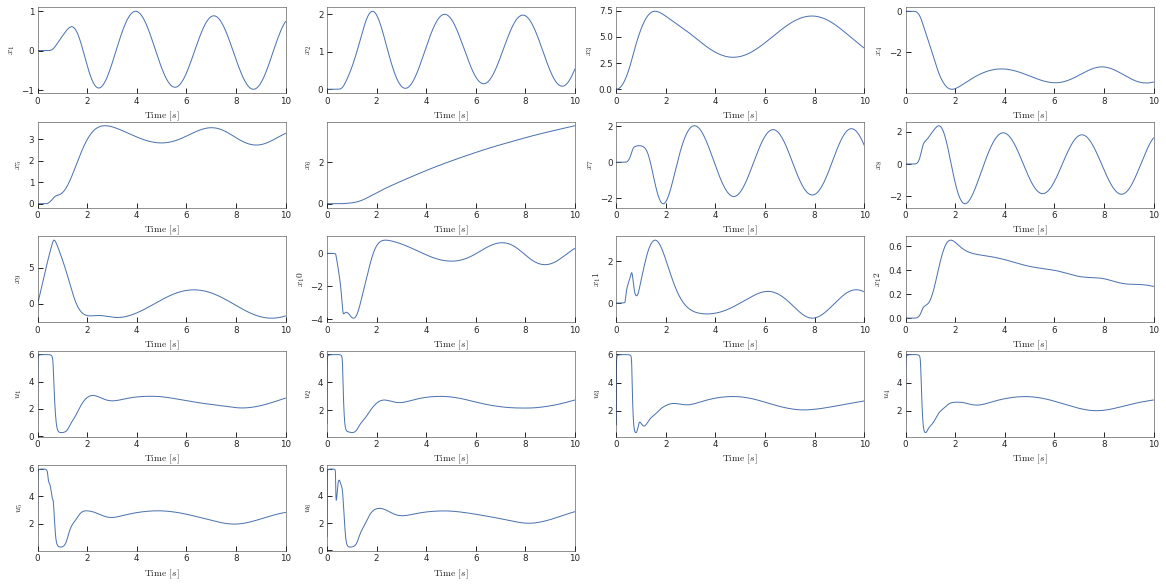

In [16]:
plottor = simplot.SimulationPlottor(model_name)
plottor.set_scales(2,5,3)
#plottor.show_plots()
plottor.save_plots()

## Draw animations of the simulation results

In [17]:
import autogenu.animation_generator as animgen

The animation of the simlation results is generated at models/hexacopter/build/simulation_result/hexacopter.mp4



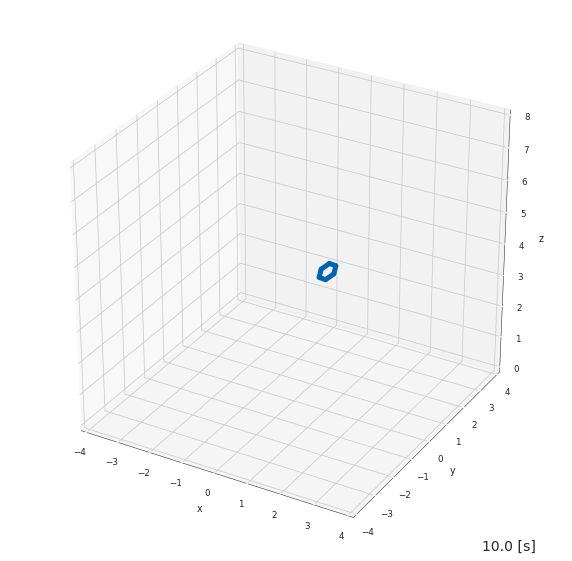

In [18]:
anim = animgen.Hexacopter(model_name)
anim.set_skip_frames(10)
anim.generate_animation()